### import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

### define columns name

In [2]:
cols = ['i1','i2','i3','i4','i5','i6','i7','i8','i9','i10','i11','i12','i13','i14','i15','i16','i17','i18','i19','i20','i21','i22','i23','i24','i25','i26','i27','i28','i29','i30','i31','i32','i33','i34','i35','i36','target',
        
        ]

### read data and display in dataframe

In [3]:
df = pd.read_csv("C:/Users/aftermath/Documents/CS-101/JARINGAN SARAF TIRUAN/tugas1/csv-dataset.csv", header=None, names=cols)
df = df.drop([df.index[0]])
df.reset_index(drop=True, inplace=True)

dfv = pd.read_csv("C:/Users/aftermath/Documents/CS-101/JARINGAN SARAF TIRUAN/tugas1/csv-dataset-validation.csv", header=None, names=cols)
dfv = dfv.drop([dfv.index[0]])
dfv.reset_index(drop=True, inplace=True)

### input learning rate and epoch

In [4]:
learningrate = input("input learning rate: ")
learningrate = float(learningrate)
epoch = input("input epoch: ")
epoch = int(epoch)

input learning rate: 0.5
input epoch: 100


### epoch-ing dataframe

In [5]:
dftraining = df
for i in range(0,epoch-1):
    dftraining = dftraining.append(df,ignore_index=True, sort=False)

### initiate weight and other variables

In [6]:
setcolumns =  ['x1','x2','x3','x4','x5','x6','x7','x8','x9','x10','x11','x12','x13','x14','x15','x16','x17','x18','x19','x20','x21','x22','x23','x24','x25','x26','x27','x28','x29','x30','x31','x32','x33','x34','x35','x36',
              'y1','y2','y3','y4','y5','y6','y7','y8','y9','y10','y11','y12','y13','y14','y15','y16','y17','y18','y19','y20','y21','y22','y23','y24','y25','y26','y27','y28','y29','y30','y31','y32','y33','y34','y35','y36',
              'z1','z2']

for setcolumn in setcolumns:
    dftraining.at[0,setcolumn] = 0.5
    dfv.at[0,setcolumn]= np.NaN
    
setcalcolumns = ['sigmoidx','sigmoidy','sigmoid','error','prediction']

for setcalcolumn in setcalcolumns:
    dftraining.at[0,setcalcolumn] = np.NaN
    dfv.at[0,setcalcolumn] = np.NaN

%matplotlib inline
counter=1
correcttraining=0
correctvalidate=0

ploterrortrain = []
plotcorrecttrain = []
ploterrorvalidate = []
plotcorrectvalidate = []
plotcounter = []

### Feed forward, backprop, and update weight

In [7]:
for i in range(0,dftraining.shape[0]-1):
    counter = counter + 1
    #get sigmoid value
    dftraining.at[i,'sigmoidx'] = dftraining.at[i,'i1']*dftraining.at[i,'x1']+dftraining.at[i,'i2']*dftraining.at[i,'x2']+dftraining.at[i,'i3']*dftraining.at[i,'x3']+dftraining.at[i,'i4']*dftraining.at[i,'x4']+dftraining.at[i,'i5']*dftraining.at[i,'x5']+dftraining.at[i,'i6']*dftraining.at[i,'x6']+dftraining.at[i,'i7']*dftraining.at[i,'x7']+dftraining.at[i,'i8']*dftraining.at[i,'x8']+dftraining.at[i,'i9']*dftraining.at[i,'x9']+    dftraining.at[i,'i10']*dftraining.at[i,'x10']+dftraining.at[i,'i11']*dftraining.at[i,'x11']+dftraining.at[i,'i12']*dftraining.at[i,'x12']+dftraining.at[i,'i13']*dftraining.at[i,'x13']+    dftraining.at[i,'i14']*dftraining.at[i,'x14']+dftraining.at[i,'i15']*dftraining.at[i,'x15']+dftraining.at[i,'i16']*dftraining.at[i,'x16']+    dftraining.at[i,'i17']*dftraining.at[i,'x17']+dftraining.at[i,'i18']*dftraining.at[i,'x18']+dftraining.at[i,'i19']*dftraining.at[i,'x19']+    dftraining.at[i,'i20']*dftraining.at[i,'x20']+dftraining.at[i,'i21']*dftraining.at[i,'x21']+dftraining.at[i,'i22']*dftraining.at[i,'x22']+dftraining.at[i,'i23']*dftraining.at[i,'x23']+    dftraining.at[i,'i24']*dftraining.at[i,'x24']+dftraining.at[i,'i25']*dftraining.at[i,'x25']+dftraining.at[i,'i26']*dftraining.at[i,'x26']+    dftraining.at[i,'i27']*dftraining.at[i,'x27']+dftraining.at[i,'i28']*dftraining.at[i,'x28']+dftraining.at[i,'i29']*dftraining.at[i,'x29']+    dftraining.at[i,'i30']*dftraining.at[i,'x30']+dftraining.at[i,'i31']*dftraining.at[i,'x31']+dftraining.at[i,'i32']*dftraining.at[i,'x32']+dftraining.at[i,'i33']*dftraining.at[i,'x33']+    dftraining.at[i,'i34']*dftraining.at[i,'x34']+dftraining.at[i,'i35']*dftraining.at[i,'x35']+dftraining.at[i,'i36']*dftraining.at[i,'x36']
    dftraining.at[i,'sigmoidx'] =  1/(1+math.exp(-dftraining.at[i,'sigmoidx']))
    
    dftraining.at[i,'sigmoidy'] = dftraining.at[i,'i1']*dftraining.at[i,'y1']+dftraining.at[i,'i2']*dftraining.at[i,'y2']+dftraining.at[i,'i3']*dftraining.at[i,'y3']+dftraining.at[i,'i4']*dftraining.at[i,'y4']+dftraining.at[i,'i5']*dftraining.at[i,'y5']+dftraining.at[i,'i6']*dftraining.at[i,'y6']+dftraining.at[i,'i7']*dftraining.at[i,'y7']+dftraining.at[i,'i8']*dftraining.at[i,'y8']+dftraining.at[i,'i9']*dftraining.at[i,'y9']+    dftraining.at[i,'i10']*dftraining.at[i,'y10']+dftraining.at[i,'i11']*dftraining.at[i,'y11']+dftraining.at[i,'i12']*dftraining.at[i,'y12']+dftraining.at[i,'i13']*dftraining.at[i,'y13']+    dftraining.at[i,'i14']*dftraining.at[i,'y14']+dftraining.at[i,'i15']*dftraining.at[i,'y15']+dftraining.at[i,'i16']*dftraining.at[i,'y16']+    dftraining.at[i,'i17']*dftraining.at[i,'y17']+dftraining.at[i,'i18']*dftraining.at[i,'y18']+dftraining.at[i,'i19']*dftraining.at[i,'y19']+    dftraining.at[i,'i20']*dftraining.at[i,'y20']+dftraining.at[i,'i21']*dftraining.at[i,'y21']+dftraining.at[i,'i22']*dftraining.at[i,'y22']+dftraining.at[i,'i23']*dftraining.at[i,'y23']+    dftraining.at[i,'i24']*dftraining.at[i,'y24']+dftraining.at[i,'i25']*dftraining.at[i,'y25']+dftraining.at[i,'i26']*dftraining.at[i,'y26']+    dftraining.at[i,'i27']*dftraining.at[i,'y27']+dftraining.at[i,'i28']*dftraining.at[i,'y28']+dftraining.at[i,'i29']*dftraining.at[i,'y29']+    dftraining.at[i,'i30']*dftraining.at[i,'y30']+dftraining.at[i,'i31']*dftraining.at[i,'y31']+dftraining.at[i,'i32']*dftraining.at[i,'y32']+dftraining.at[i,'i33']*dftraining.at[i,'y33']+    dftraining.at[i,'i34']*dftraining.at[i,'y34']+dftraining.at[i,'i35']*dftraining.at[i,'y35']+dftraining.at[i,'i36']*dftraining.at[i,'y36']
    dftraining.at[i,'sigmoidy'] =  1/(1+math.exp(-dftraining.at[i,'sigmoidy']))
    
    
    dftraining.at[i,'sigmoid'] = dftraining.at[i,'sigmoidx']*dftraining.at[i,'z1']+dftraining.at[i,'sigmoidy']*dftraining.at[i,'z2']
    dftraining.at[i,'sigmoid'] =  1/(1+math.exp(-dftraining.at[i,'sigmoid']))
    
    #if else statements for sigmoid value
    if dftraining.at[i,'sigmoid']>0.5:
        dftraining.at[i,'prediction']= 1
    else:
        dftraining.at[i,'prediction']= 0
    
    #counts error
    dftraining.at[i,'error'] = math.pow(float(dftraining.at[i,'target'])-float(dftraining.at[i,'sigmoid']),2)/2
    
    #update z1 and z2 (output layer)
    derrivatives = -1*(float(dftraining.at[i,'target'])-float(dftraining.at[i,'sigmoid']))*float(dftraining.at[i,'sigmoid'])*(1-float(dftraining.at[i,'sigmoid']))

    dftraining.at[i+1,'z1'] = dftraining.at[i,'z1']-learningrate*derrivatives*dftraining.at[i,'sigmoidx']
    dftraining.at[i+1,'z2'] = dftraining.at[i,'z2']-learningrate*derrivatives*dftraining.at[i,'sigmoidy']
    
    
    #weight update layer 1 (hidden layer)
    for j in range(1,37):
        dftraining.at[i+1,'x'+str(j)] = dftraining.at[i,'x'+str(j)]-learningrate*derrivatives*dftraining.at[i,'i'+str(j)]*dftraining.at[i,'sigmoidx']*(1-dftraining.at[i,'sigmoidx'])
        dftraining.at[i+1,'y'+str(j)] = dftraining.at[i,'y'+str(j)]-learningrate*derrivatives*dftraining.at[i,'i'+str(j)]*dftraining.at[i,'sigmoidy']*(1-dftraining.at[i,'sigmoidy'])
        
    #get correct number of training
    if float(dftraining.at[i,'prediction']) == float(dftraining.at[i,'target']) :
        correcttraining = correcttraining + 1
    
    if counter % 16 == 0 : 
        ########################
        dfvalidating = dfv
        
        dfvalidating.at[0,'z1'] = dftraining.at[i,'z1']
        dfvalidating.at[0,'z2'] = dftraining.at[i,'z2']
        
        for k in range(1,37):
            dfvalidating.at[0,'x'+str(k)] = dftraining.at[i,'x'+str(k)]
            dfvalidating.at[0,'y'+str(k)] = dftraining.at[i,'y'+str(k)]
        
        for l in range(0,dfvalidating.shape[0]-1):
            #predict validation using weight from training
            dfvalidating.at[l,'sigmoidx'] = dfvalidating.at[l,'i1']*dfvalidating.at[0,'x1']+dfvalidating.at[l,'i2']*dfvalidating.at[0,'x2']+dfvalidating.at[l,'i3']*dfvalidating.at[0,'x3']+dfvalidating.at[l,'i4']*dfvalidating.at[0,'x4']+dfvalidating.at[l,'i5']*dfvalidating.at[0,'x5']+dfvalidating.at[l,'i6']*dfvalidating.at[0,'x6']+dfvalidating.at[l,'i7']*dfvalidating.at[0,'x7']+dfvalidating.at[l,'i8']*dfvalidating.at[0,'x8']+dfvalidating.at[l,'i9']*dfvalidating.at[0,'x9']+dfvalidating.at[l,'i10']*dfvalidating.at[0,'x10']+dfvalidating.at[l,'i11']*dfvalidating.at[0,'x11']+dfvalidating.at[l,'i12']*dfvalidating.at[0,'x12']+dfvalidating.at[l,'i13']*dfvalidating.at[0,'x13']+dfvalidating.at[l,'i14']*dfvalidating.at[0,'x14']+dfvalidating.at[l,'i15']*dfvalidating.at[0,'x15']+dfvalidating.at[l,'i16']*dfvalidating.at[0,'x16']+dfvalidating.at[l,'i17']*dfvalidating.at[0,'x17']+dfvalidating.at[l,'i18']*dfvalidating.at[0,'x18']+dfvalidating.at[l,'i19']*dfvalidating.at[0,'x19']+dfvalidating.at[l,'i20']*dfvalidating.at[0,'x20']+dfvalidating.at[l,'i21']*dfvalidating.at[0,'x21']+dfvalidating.at[l,'i22']*dfvalidating.at[0,'x22']+dfvalidating.at[l,'i23']*dfvalidating.at[0,'x23']+dfvalidating.at[l,'i24']*dfvalidating.at[0,'x24']+dfvalidating.at[l,'i25']*dfvalidating.at[0,'x25']+dfvalidating.at[l,'i26']*dfvalidating.at[0,'x26']+dfvalidating.at[l,'i27']*dfvalidating.at[0,'x27']+dfvalidating.at[l,'i28']*dfvalidating.at[0,'x28']+dfvalidating.at[l,'i29']*dfvalidating.at[0,'x29']+dfvalidating.at[l,'i30']*dfvalidating.at[0,'x30']+dfvalidating.at[l,'i31']*dfvalidating.at[0,'x31']+dfvalidating.at[l,'i32']*dfvalidating.at[0,'x32']+dfvalidating.at[l,'i33']*dfvalidating.at[0,'x33']+dfvalidating.at[l,'i34']*dfvalidating.at[0,'x34']+dfvalidating.at[l,'i35']*dfvalidating.at[0,'x35']+dfvalidating.at[l,'i36']*dfvalidating.at[0,'x36']
            dfvalidating.at[l,'sigmoidx'] =  1/(1+math.exp(-dfvalidating.at[l,'sigmoidx']))
            
            dfvalidating.at[l,'sigmoidy'] = dfvalidating.at[l,'i1']*dfvalidating.at[0,'y1']+dfvalidating.at[l,'i2']*dfvalidating.at[0,'y2']+dfvalidating.at[l,'i3']*dfvalidating.at[0,'y3']+dfvalidating.at[l,'i4']*dfvalidating.at[0,'y4']+dfvalidating.at[l,'i5']*dfvalidating.at[0,'y5']+dfvalidating.at[l,'i6']*dfvalidating.at[0,'y6']+dfvalidating.at[l,'i7']*dfvalidating.at[0,'y7']+dfvalidating.at[l,'i8']*dfvalidating.at[0,'y8']+dfvalidating.at[l,'i9']*dfvalidating.at[0,'y9']+dfvalidating.at[l,'i10']*dfvalidating.at[0,'y10']+dfvalidating.at[l,'i11']*dfvalidating.at[0,'y11']+dfvalidating.at[l,'i12']*dfvalidating.at[0,'y12']+dfvalidating.at[l,'i13']*dfvalidating.at[0,'y13']+dfvalidating.at[l,'i14']*dfvalidating.at[0,'y14']+dfvalidating.at[l,'i15']*dfvalidating.at[0,'y15']+dfvalidating.at[l,'i16']*dfvalidating.at[0,'y16']+dfvalidating.at[l,'i17']*dfvalidating.at[0,'y17']+dfvalidating.at[l,'i18']*dfvalidating.at[0,'y18']+dfvalidating.at[l,'i19']*dfvalidating.at[0,'y19']+dfvalidating.at[l,'i20']*dfvalidating.at[0,'y20']+dfvalidating.at[l,'i21']*dfvalidating.at[0,'y21']+dfvalidating.at[l,'i22']*dfvalidating.at[0,'y22']+dfvalidating.at[l,'i23']*dfvalidating.at[0,'y23']+dfvalidating.at[l,'i24']*dfvalidating.at[0,'y24']+dfvalidating.at[l,'i25']*dfvalidating.at[0,'y25']+dfvalidating.at[l,'i26']*dfvalidating.at[0,'y26']+dfvalidating.at[l,'i27']*dfvalidating.at[0,'y27']+dfvalidating.at[l,'i28']*dfvalidating.at[0,'y28']+dfvalidating.at[l,'i29']*dfvalidating.at[0,'y29']+dfvalidating.at[l,'i30']*dfvalidating.at[0,'y30']+dfvalidating.at[l,'i31']*dfvalidating.at[0,'y31']+dfvalidating.at[l,'i32']*dfvalidating.at[0,'y32']+dfvalidating.at[l,'i33']*dfvalidating.at[0,'y33']+dfvalidating.at[l,'i34']*dfvalidating.at[0,'y34']+dfvalidating.at[l,'i35']*dfvalidating.at[0,'y35']+dfvalidating.at[l,'i36']*dfvalidating.at[0,'y36']
            dfvalidating.at[l,'sigmoidy'] =  1/(1+math.exp(-dfvalidating.at[l,'sigmoidy']))
            
            dfvalidating.at[l,'sigmoid'] = dfvalidating.at[l,'sigmoidx']*dfvalidating.at[l,'z1'] +dfvalidating.at[l,'sigmoidy']*dfvalidating.at[l,'z2']
            dfvalidating.at[l,'sigmoid'] = 1/(1+math.exp(-dfvalidating.at[l,'sigmoid']))
            
            if dfvalidating.at[l,'sigmoid']>0.5:
                dfvalidating.at[l,'prediction']= 1
            else:
                dfvalidating.at[l,'prediction']= 0
                
            #get error
            dfvalidating.at[l,'error'] = math.pow(float(dfvalidating.at[l,'target'])-float(dfvalidating.at[l,'sigmoid']),2)/2
                
            #get correct number of training
            if float(dfvalidating.at[l,'prediction']) == float(dfvalidating.at[l,'target']) :
                correctvalidate = correctvalidate + 1
        
        ########################
        ploterrortrain.append(dftraining.at[i,'error']*100)
        plotcorrecttrain.append(100*correcttraining/16) 
        
        ploterrorvalidate.append(dfvalidating['error'].mean()*100)
        plotcorrectvalidate.append(100*correctvalidate/8)
        
        plotcounter.append(counter/16)
        
        correcttraining = correctvalidate= 0


In [8]:
dfvalidating.head()

,i1,i2,i3,i4,i5,i6,i7,i8,i9,i10,i11,i12,i13,i14,i15,i16,i17,i18,i19,i20,i21,i22,i23,i24,i25,i26,i27,i28,i29,i30,i31,i32,i33,i34,i35,i36,target,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,y1,y2,y3,y4,y5,y6,y7,y8,y9,y10,y11,y12,y13,y14,y15,y16,y17,y18,y19,y20,y21,y22,y23,y24,y25,y26,y27,y28,y29,y30,y31,y32,y33,y34,y35,y36,z1,z2,sigmoidx,sigmoidy,sigmoid,error,prediction
0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,1,0,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.5,0.5,-0.367249,-0.367249,0.5,0.5,0.536998,0.214062,-0.251083,0.019304,-0.044353,0.5,-0.075969,-1.655469,0.594678,0.123285,-0.663256,0.5,-0.075969,-1.618471,0.925741,-0.73566,-0.800677,0.5,0.536998,0.05047,-0.642386,-0.160344,0.657509,0.5,0.536998,0.702386,0.760066,0.760066,0.723067,0.576529,0.5,0.5,-0.367249,-0.367249,0.5,0.5,0.536998,0.214062,-0.251083,0.019304,-0.044353,0.5,-0.075969,-1.655469,0.594678,0.123285,-0.663256,0.5,-0.075969,-1.618471,0.925741,-0.73566,-0.800677,0.5,0.536998,0.05047,-0.642386,-0.160344,0.657509,0.5,0.536998,0.702386,0.760066,0.760066,0.723067,0.576529,1.668148,1.668148,0.277819,0.277819,0.716443,0.256645,1.0
1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.003263,0.003263,NaN,NaN,0.0
2,0,0,0,0,0,0,0,0,1,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,1,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.058091,0.058091,NaN,NaN,0.0
3,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.198890,0.198890,NaN,NaN,0.0
4,0,0,0,0,0,0,0,1,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,1,1,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.977364,0.977364,NaN,NaN,0.0


Learning Rate:  0.5  Epochs:  100


Text(0, 0.5, 'error')

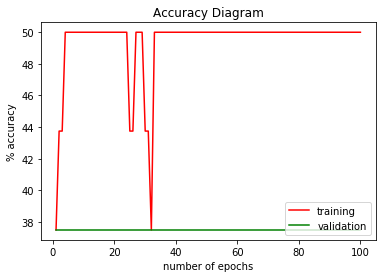

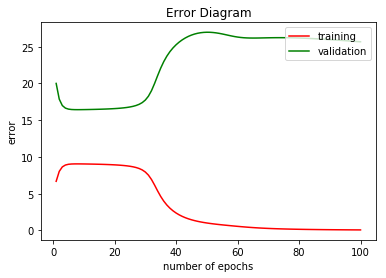

In [9]:
fig, plotaccuracy = plt.subplots()
fig, ploterror = plt.subplots()

print("Learning Rate: ",learningrate," Epochs: ",epoch)
plotaccuracy.plot(plotcounter, plotcorrecttrain, color="red",label="training")
plotaccuracy.plot(plotcounter, plotcorrectvalidate, color = "green", label = "validation")
plotaccuracy.legend(loc = "lower right") 
plotaccuracy.set_title("Accuracy Diagram")
plotaccuracy.set_xlabel("number of epochs")
plotaccuracy.set_ylabel("% accuracy")


ploterror.plot(plotcounter, ploterrortrain, color = "red",label = "training")
ploterror.plot(plotcounter, ploterrorvalidate, color = "green", label = "validation")
ploterror.legend(loc = "upper right")
ploterror.set_title("Error Diagram")
ploterror.set_xlabel("number of epochs")
ploterror.set_ylabel("error")